In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import wilcoxon

sns.set_style("whitegrid")

## Check controls: in-vitro array, and naked plasmid

#### This plasmid contains a part of the sequence of the ARS305 locus

In [204]:
ls controls/

DIES6_ALL_REP1_in_vitro_nucl_array.txt
DIES6_ALL_REP1_naked_plasmid.txt
DIES6_REP2_780READS_in_vitro_nucl_array.txt
DIES6_rep2_780READS_naked_plasmid.txt
array_disw2_rep1_780READS_noNA.csv
array_disw2_rep2_780READS_noNA_cleaned.csv
array_smoothed_average_methylation_winsize_30.csv
array_smoothed_fold_changes_winsize_30.csv
mat_Megalodon_repII_in_vitro_nucl_array.txt
naked_plasmid.dna
naked_plasmid_disw2_rep1_clean_780READS.csv
naked_plasmid_disw2_rep2_clean_780_reads.csv
naked_plasmid_wt_rep2_1000reads.txt
nucarray_pooled_data.png
nucarray_scaled_pooled_data.png
plasmid_smoothed_average_methylation_winsize_30.csv
plasmid_smoothed_fold_changes_winsize_30.csv
unused_files/
wt_mat_Megalodon_repIII_in_vitro_nucl_array.txt
wt_mat_Megalodon_repIII_naked_plasmid.txt


In [205]:
wt_rep3_nucarray = np.loadtxt("controls/wt_mat_Megalodon_repIII_in_vitro_nucl_array.txt")
wt_rep3_nucarray.shape

(780, 1966)

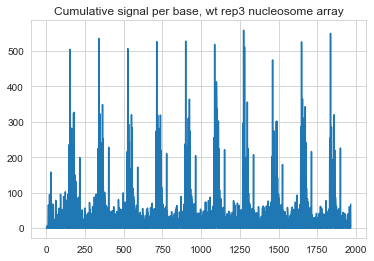

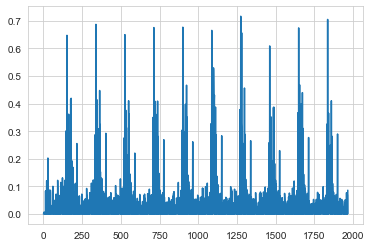

In [206]:
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), y = np.cumsum(wt_rep3_nucarray, axis = 0)[779,:])
plt.title("Cumulative signal per base, wt rep3 nucleosome array")
plt.show()
#the last line of the array contains the cumulative occupation per base

sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), y = np.mean(wt_rep3_nucarray, axis = 0))
plt.show()

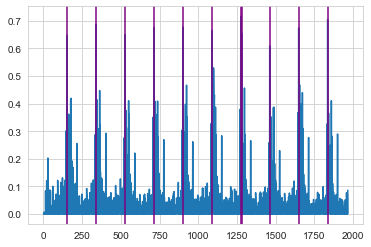

In [207]:
peaks = np.where(np.mean(wt_rep3_nucarray, axis = 0) >0.6)

sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), y = np.mean(wt_rep3_nucarray, axis = 0))
for position in peaks[0]:
    plt.axvline(position, color = "purple")
plt.show()

In [208]:
np.gradient(peaks[0]).mean()

170.0

Text(0.5, 1.0, 'wt rep nuc array')

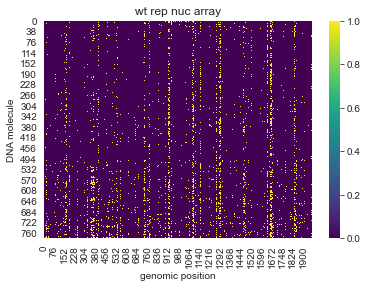

In [209]:
#heatmap of the wt raw data
sns.heatmap(wt_rep3_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("wt rep nuc array")

In [210]:
# load the other replicate, and the counts from the mutants:

wt_rep2_nucarray = np.loadtxt("controls/mat_Megalodon_repII_in_vitro_nucl_array.txt")

dies6_rep1_nucarray = np.loadtxt("controls/DIES6_ALL_REP1_in_vitro_nucl_array.txt")
dies6_rep2_nucarray = np.loadtxt("controls/DIES6_REP2_780READS_in_vitro_nucl_array.txt")

disw2_rep1_nucarray = np.genfromtxt("controls/array_disw2_rep1_780READS_noNA.csv",
                                   dtype = int, delimiter = ",")

#disw2_rep2_nucarray = np.genfromtxt("controls/array_disw2_rep2_780READS_noNA.csv",
#                                   dtype = int, delimiter = ",")
#delete the first three columns as they come from linker DNA 
#disw2_rep2_nucarray_trimmed = disw2_rep2_nucarray[:, 30:]
#np.savetxt("controls/array_disw2_rep2_780READS_noNA_cleaned.csv", disw2_rep2_nucarray_trimmed)#

disw2_rep2_nucarray = np.loadtxt("controls/array_disw2_rep2_780READS_noNA_cleaned.csv")

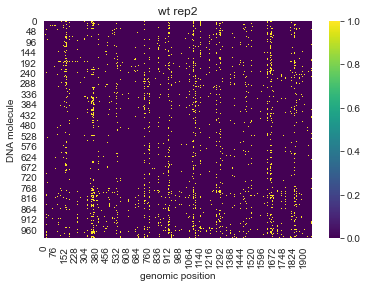

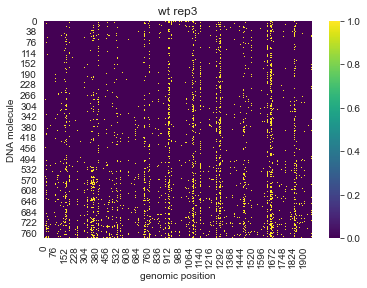

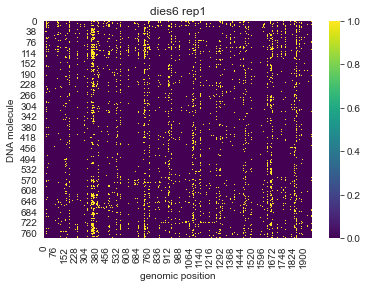

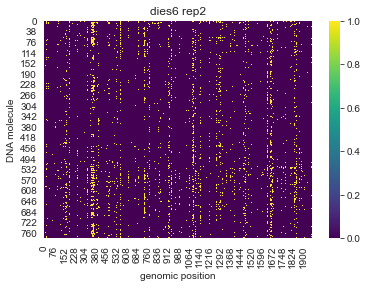

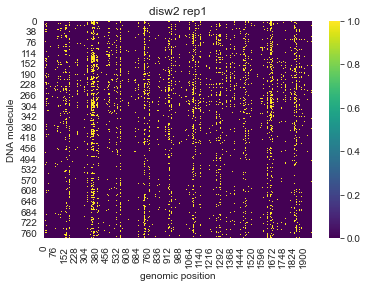

Text(0.5, 1.0, 'disw2 rep2')

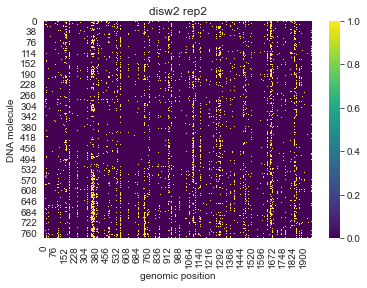

In [211]:
sns.heatmap(wt_rep2_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("wt rep2")
plt.show()

sns.heatmap(wt_rep3_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("wt rep3")
plt.show()

sns.heatmap(dies6_rep1_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("dies6 rep1")
plt.show()

sns.heatmap(dies6_rep2_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("dies6 rep2")
plt.show()

sns.heatmap(disw2_rep1_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("disw2 rep1")
plt.show()

sns.heatmap(disw2_rep2_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("disw2 rep2")

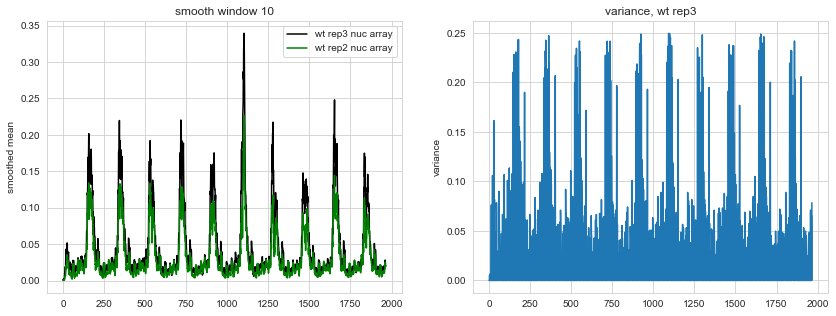

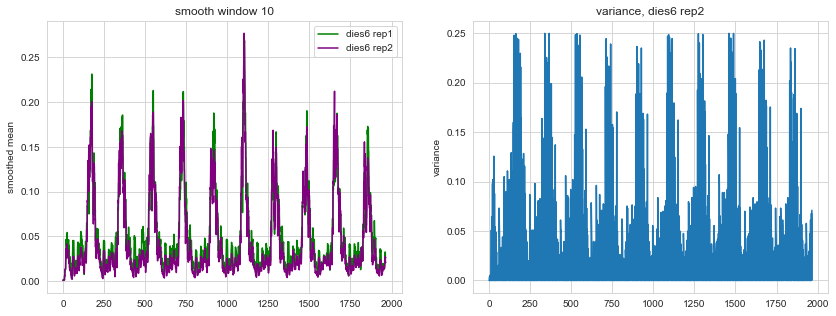

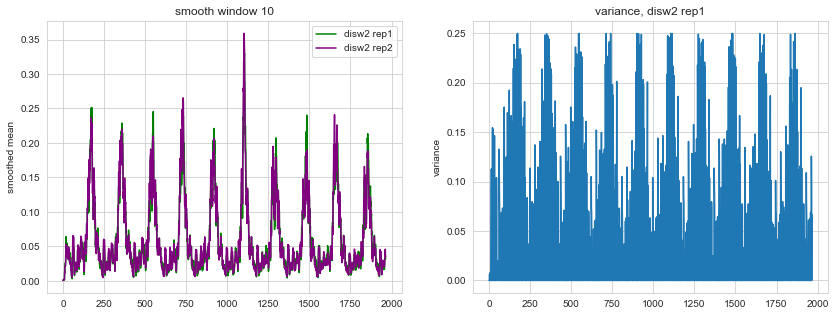

wt:  3.6679572617529154e-102
dies6:  5.234857328878377e-57
disw2:  0.02275886341794949


In [212]:
### compare replicates smoothed mean and varinace of wildtype, dies6 and disw2

smooth = 10

#wildtype
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.convolve(wt_rep3_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "black", label = "wt rep3 nuc array", ax = ax1)
sns.lineplot(x = range(wt_rep2_nucarray.shape[1]), 
                 y = np.convolve(wt_rep2_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "green", label = "wt rep2 nuc array", ax = ax1)
ax1.set_ylabel("smoothed mean")
ax1.set_title("smooth window " + str(smooth))

sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = wt_rep3_nucarray.std(axis = 0)**2, ax = ax2)
plt.ylabel("variance")
ax2.set_title("variance, wt rep3")
plt.show()

#DIES6
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.convolve(dies6_rep1_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "green", label = "dies6 rep1", ax = ax1)
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.convolve(dies6_rep2_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "purple", label = "dies6 rep2", ax = ax1)
ax1.set_ylabel("smoothed mean")
ax1.set_title("smooth window " + str(smooth))

sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = dies6_rep2_nucarray.std(axis = 0)**2, ax = ax2)
plt.ylabel("variance")
ax2.set_title("variance, dies6 rep2")
plt.show()

#DISW2
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.convolve(disw2_rep1_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "green", label = "disw2 rep1", ax = ax1)
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.convolve(disw2_rep2_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "purple", label = "disw2 rep2", ax = ax1)
ax1.set_ylabel("smoothed mean")
ax1.set_title("smooth window " + str(smooth))

sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = disw2_rep1_nucarray.std(axis = 0)**2, ax = ax2)
plt.ylabel("variance")
ax2.set_title("variance, disw2 rep1")
plt.show()

print("wt: ", wilcoxon(wt_rep3_nucarray.mean(axis = 0), wt_rep2_nucarray.mean(axis =0), 
               alternative ="two-sided").pvalue)
print("dies6: ", wilcoxon(dies6_rep1_nucarray.mean(axis = 0), dies6_rep2_nucarray.mean(axis =0), 
               alternative ="two-sided").pvalue)
print("disw2: ", wilcoxon(disw2_rep1_nucarray.mean(axis = 0), disw2_rep2_nucarray.mean(axis =0), 
               alternative ="two-sided").pvalue)

In [213]:
wt_rep3_smooth_mean = np.convolve(wt_rep3_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
wt_rep2_smooth_mean = np.convolve(wt_rep2_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
dies6_rep1_smooth_mean = np.convolve(dies6_rep1_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
dies6_rep2_smooth_mean = np.convolve(dies6_rep2_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")

means_nucarray = np.concatenate((wt_rep3_smooth_mean.reshape(1, 1966),
                                 wt_rep2_smooth_mean.reshape(1, 1966),
                              dies6_rep1_smooth_mean.reshape(1, 1966),
                              dies6_rep2_smooth_mean.reshape(1, 1966)),
                              axis = 0)

w, p = wilcoxon(means_nucarray[2,:], means_nucarray[3,:], alternative = "two-sided")
print("Comparing dies6 replicates after smoothing: ", w,p)

#the statistical test shows that the replicates of the mutants are rather different: 
w_2, p_2 = wilcoxon(dies6_rep1_nucarray.mean(axis = 0), 
                    dies6_rep2_nucarray.mean(axis = 0), alternative = "two-sided") #p-value 5.23 * e-57
print("comparing dies6 replicates: ", w_2, p_2)

#disw2 replicates pass the statistical test for being similar:
w_3, p_3 = wilcoxon(disw2_rep1_nucarray.mean(axis = 0), 
                    disw2_rep2_nucarray.mean(axis = 0), alternative = "two-sided")
print(w_3, p_3)

#disw2 replicates pass the statistical test for being similar:
w_4, p_4 = wilcoxon(wt_rep3_nucarray.mean(axis = 0), 
                    wt_rep2_nucarray.mean(axis = 0), alternative = "two-sided")
print("Comparing wild-type replictes: ", w_4, p_4)

Comparing dies6 replicates after smoothing:  240845.0 5.311775211271692e-182
comparing dies6 replicates:  83049.0 5.234857328878377e-57
193039.5 0.02275886341794949
Comparing wild-type replictes:  44512.0 3.6679572617529154e-102


## Check the negative control: "naked plasmid" 
#### purified plasmid was added after locus purification. should have ~uniform methylation

In [214]:
wt_rep3_naked_plasmid = np.loadtxt("controls/wt_mat_Megalodon_repIII_naked_plasmid.txt")
#wt_rep2_naked_plasmid = np.loadtxt("controls/mat_Megalodon_repII_naked_plasmid.txt")

In [215]:
set(wt_rep3_naked_plasmid.flatten())
np.isnan(wt_rep3_naked_plasmid).sum()

wt_rep3_naked_plasmid.mean(axis = 0)

array([0.        , 0.        , 0.67820513, ..., 0.00769231, 0.00384615,
       0.02435897])

In [216]:
def entropy(labels, base=None):
    base = math.e if base is None else base
    _ ,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()

    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

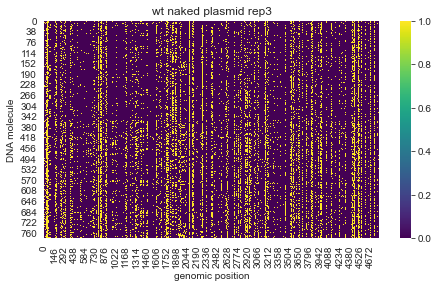

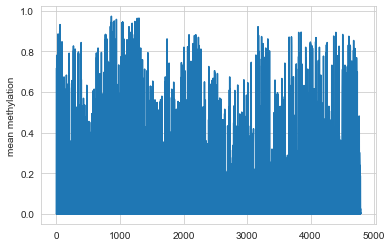

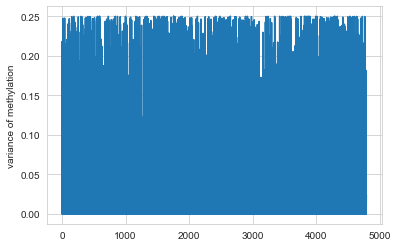

<AxesSubplot:title={'center':'naked plasmid wt rep3, entropy per position'}, ylabel='entropy'>

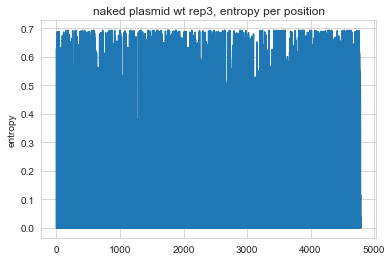

In [217]:
plt.figure(figsize=(7.5,4))
sns.heatmap(wt_rep3_naked_plasmid, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("wt naked plasmid rep3")
plt.show()

sns.lineplot(x = range(wt_rep3_naked_plasmid.shape[1]), 
             y = wt_rep3_naked_plasmid.mean(axis = 0))
plt.ylabel("mean methylation")
plt.show()

sns.lineplot(x = range(wt_rep3_naked_plasmid.shape[1]), 
             y = wt_rep3_naked_plasmid.std(axis = 0)**2)
plt.ylabel("variance of methylation")
plt.show()

g = sns.lineplot(x = range(wt_rep3_naked_plasmid.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, wt_rep3_naked_plasmid))
g.set_ylabel("entropy")
g.set_title("naked plasmid wt rep3, entropy per position")
#g.set_xticks(range(0, ARS305_wt.shape[1], 50))
g

<AxesSubplot:title={'center':'nucarray wt rep3, entropy per position'}, ylabel='entropy'>

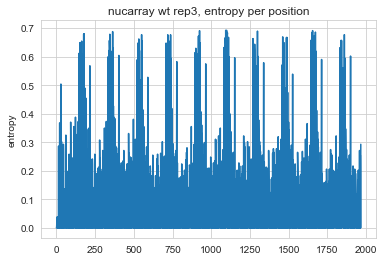

In [218]:
g = sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, wt_rep3_nucarray))
g.set_ylabel("entropy")
g.set_title("nucarray wt rep3, entropy per position")
g

In [219]:
## How do the mutants change the variability of methylation for the "naked plasmid" ?
wt_rep2_naked_plasmid = np.loadtxt("controls/naked_plasmid_wt_rep2_1000reads.txt")

dies6_rep1_naked = np.loadtxt("controls/DIES6_ALL_REP1_naked_plasmid.txt")
dies6_rep2_naked = np.loadtxt("controls/DIES6_rep2_780READS_naked_plasmid.txt")

disw2_rep1_naked = np.loadtxt("controls/naked_plasmid_disw2_rep1_clean_780READS.csv")
disw2_rep2_naked = np.loadtxt("controls/naked_plasmid_disw2_rep2_clean_780_reads.csv")

Text(0.5, 1.0, 'naked plasmid wt rep2, entropy per position')

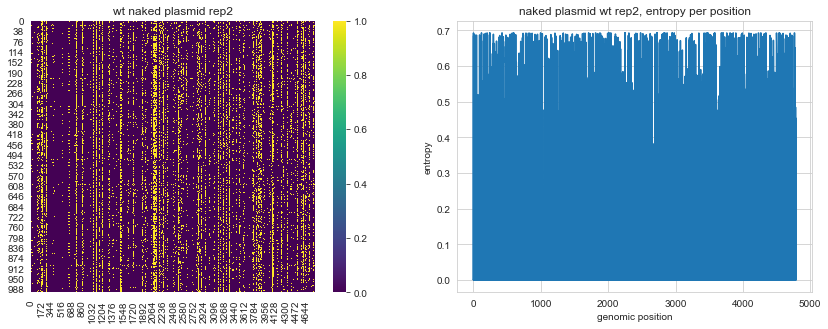

In [220]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))

sns.heatmap(wt_rep2_naked_plasmid, cmap = "viridis", ax =ax1)
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
ax1.set_title("wt naked plasmid rep2")

sns.set_style("whitegrid")
sns.lineplot(x = range(wt_rep2_naked_plasmid.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, wt_rep2_naked_plasmid), ax = ax2)
plt.ylabel("entropy")
ax2.set_title("naked plasmid wt rep2, entropy per position")


<AxesSubplot:title={'center':'naked plasmid disw2 rep1, entropy per position'}, ylabel='entropy'>

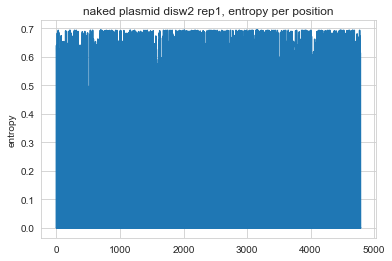

In [221]:
g = sns.lineplot(x = range(disw2_rep1_naked.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, disw2_rep1_naked))
g.set_ylabel("entropy")
g.set_title("naked plasmid disw2 rep1, entropy per position")
g

## Read in samples for origin ARS305 to set up the annotation of the nucleosome areas

## Wildtype

In [222]:
ARS305_wt = np.loadtxt("ARS305/wt_mat_Megalodon_repIII_ARS305_end_LexA.txt")

#replicate 2
ARS305_wt_rep2 = np.genfromtxt("ARS305/ARS305_wt_REP2_noNA.csv", dtype = int, delimiter = ",")
#feature annotation

#ARS305_anno = pd.read_csv("ARS305/Features_from ARS305_end_LexA _(31 .. 1124).txt", sep  = "\t", 
#                          header = None, index_col = 0)
#ARS305_anno.columns = ["position", "length"]

ARS305_anno = pd.read_csv("ARS305/coordinates_ARS305.txt", sep  = "\t", 
                          header = None, index_col = 0)
ARS305_anno.columns = ["position"]

ARS305_anno.index = ARS305_anno.index.astype("string")
ARS305_anno.index = ARS305_anno.index.str.strip()

ARS305_anno["pos_start"] = ARS305_anno.position.str.split(".").str[0].astype(int) -1
ARS305_anno["pos_stop"] = ARS305_anno.position.str.split(".").str[2].astype(int) -1

ARS305_anno["length"] = ARS305_anno.pos_stop - ARS305_anno.pos_start

In [223]:
#ARS305_wt_rep2.drop(index = ARS305_wt_rep2.index[700:722], inplace =True)

In [224]:
ARS305_anno #.loc["ARS305", "pos_start"]

,position,pos_start,pos_stop,length
0,,,,
-3ns,100..150,99,149,50
-2L,180..200,179,199,20
-2ns,250..300,249,299,50
-1L,370..380,369,379,10
-1ns,400..450,399,449,50
ARS305,525..575,524,574,50
+1ns,650..700,649,699,50
+2ns,825..875,824,874,50
+2L,930..960,929,959,30


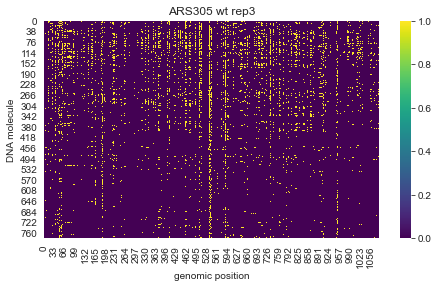

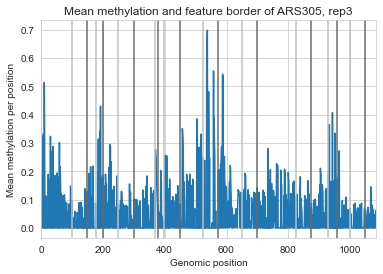

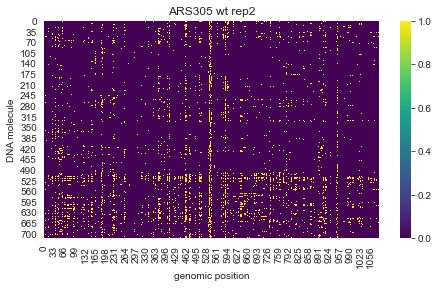

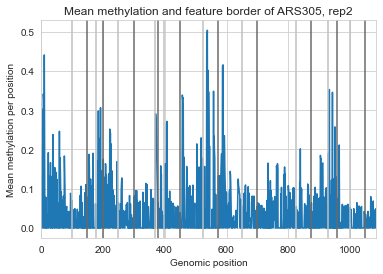

In [225]:
#plot the raw data:
plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 1084)
plt.title("ARS305 wt rep3")
plt.show()

#and the bulk data:
sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = ARS305_wt.mean(axis = 0)
                )
plt.xlabel("Genomic position")
plt.ylabel("Mean methylation per position")
plt.title("Mean methylation and feature border of ARS305, rep3")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
plt.show()

#wildtype replicate 2:
plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt_rep2, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 1084)
plt.title("ARS305 wt rep2")
plt.show()

sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = ARS305_wt_rep2.mean(axis = 0)
                )
plt.xlabel("Genomic position")
plt.ylabel("Mean methylation per position")
plt.title("Mean methylation and feature border of ARS305, rep2")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
plt.show()

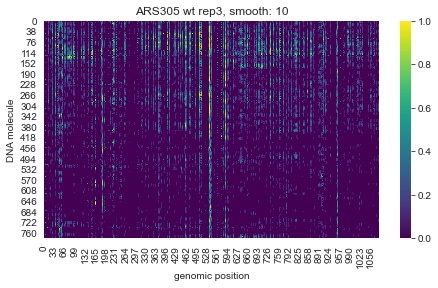

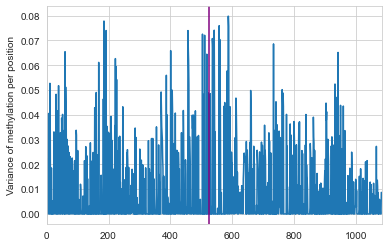

In [226]:
smooth_window = 10

def smooth(array):
        return np.convolve(array, np.ones(smooth_window)/smooth_window, mode = "same")
    
ARS305_wt_smooth = np.apply_along_axis(smooth, 0, ARS305_wt)
    
plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt_smooth, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 1084)
plt.title("ARS305 wt rep3, smooth: " + str(smooth_window))
plt.show()

sns.lineplot(x = range(ARS305_wt_smooth.shape[1]), 
                 y = ARS305_wt_smooth.std(axis = 0)**2
                )
plt.ylabel("Variance of methylation per position")
plt.xlim(0, 1084)
plt.axvline(ARS305_anno.loc["ARS305", "pos_start"], color = "purple")
plt.show()

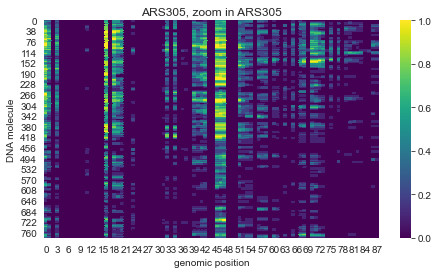

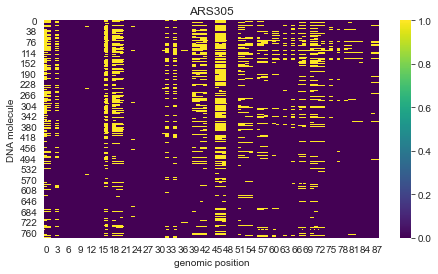

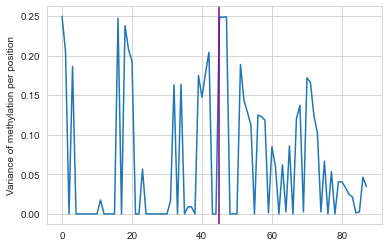

In [227]:
plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt_smooth[:, 542:630], cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 630-542)
plt.title("ARS305, zoom in ARS305")
plt.show()

plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt[:, 542:630], cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 630-542)
plt.title("ARS305")
plt.show()

sns.lineplot(x = range(630-542), 
                 y = ARS305_wt[:, 542:630].std(axis = 0)**2
                )
plt.axvline(45, color = "purple")
plt.ylabel("Variance of methylation per position")
plt.show()

#sns.lineplot(x = range(630-542), 
#                 y = ARS305_wt[:, 542:630].cumsum(axis = 0)[779, :]/779
#            )
#plt.axvline(45, color = "purple")
#plt.ylabel("Percent methylated")
#plt.show()

In [228]:
#this computes the percent of methylation at a specific base

#sns.lineplot(x = range(ARS305_wt.shape[1]), 
#             y = ARS305_wt[779,:].cumsum(axis = 0)/780)
ARS305_wt[779,:].cumsum(axis = 0)/780

array([0.00128205, 0.00128205, 0.00128205, ..., 0.07564103, 0.07564103,
       0.07564103])

<AxesSubplot:>

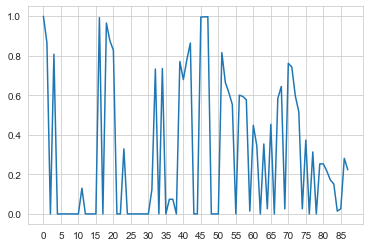

In [229]:
#as a measure for the heterogeneity, try the entropy:
# alternatively, try: from scipy.stats import entropy
import math

def entropy(labels, base=None):
    base = 2 if base is None else base
    _ ,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()

    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

#https://stackoverflow.com/questions/15450192/fastest-way-to-compute-entropy-in-python

#entropy(ARS305_wt[:,6])
#np.unique(ARS305_wt[:,6], return_counts = True)

g = sns.lineplot(x = range(630-542), y = np.apply_along_axis(entropy, 0, ARS305_wt[:, 542:630]))
g.set_xticks(range(0, 630-542, 5))
g

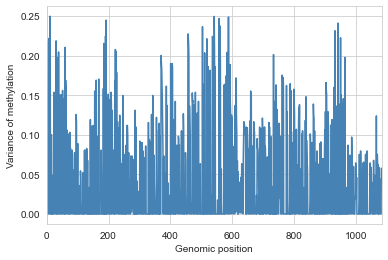

<AxesSubplot:title={'center':'ARS305 wt rep3, entropy per position'}, ylabel='entropy'>

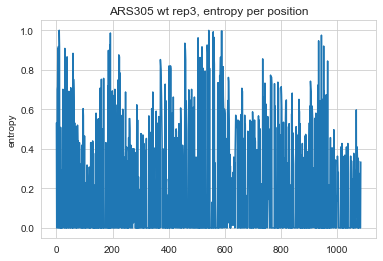

In [230]:
sns.lineplot(x = range(ARS305_wt.shape[1]), 
            y = ARS305_wt.std(axis = 0)**2, color = "steelblue"
            )
plt.ylabel("Variance of methylation")
plt.xlabel("Genomic position")

plt.xlim(0, 1084)

plt.show()

g = sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, ARS305_wt))
g.set_ylabel("entropy")
g.set_title("ARS305 wt rep3, entropy per position")
#g.set_xticks(range(0, ARS305_wt.shape[1], 50))
g

In [231]:
entropy_ARS305_wt = np.apply_along_axis(entropy, 0, ARS305_wt)
entropy_ARS305_wt.min(), entropy_ARS305_wt.max(), np.count_nonzero(entropy_ARS305_wt)

(-0.0, 0.9995256892936492, 545)

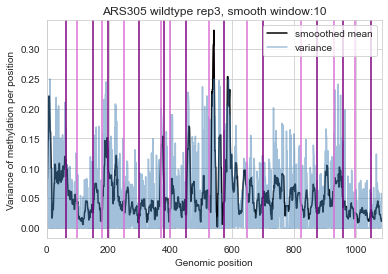

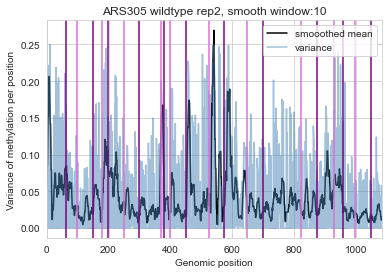

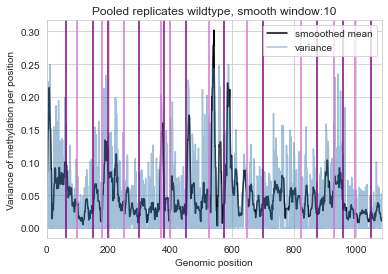

In [232]:
N = 10

sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = np.convolve(ARS305_wt.mean(axis = 0), np.ones(N)/N, mode ="same"),
             color = "black", label = "smooothed mean")
#plt.ylabel("Mean methylation over sample")
plt.xlim(0, ARS305_wt_smooth.shape[1])
plt.title("ARS305 wildtype rep3, smooth window:" + str(N))


sns.lineplot(x = range(ARS305_wt.shape[1]), 
            y = ARS305_wt.std(axis = 0)**2, color = "steelblue", alpha = 0.5,
            label = "variance"
            )
plt.ylabel("Variance of methylation per position")
plt.xlabel("Genomic position")
plt.axvline(62, color = "purple", label = "border")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "orchid")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "purple")
plt.show()
    
# Compare that the other replicate
sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = np.convolve(ARS305_wt_rep2.mean(axis = 0), np.ones(N)/N, mode ="same"),
             color = "black", label = "smooothed mean")
#plt.ylabel("Mean methylation over sample")
plt.xlim(0, ARS305_wt_smooth.shape[1])
plt.title("ARS305 wildtype rep2, smooth window:" + str(N))
sns.lineplot(x = range(ARS305_wt.shape[1]), 
            y = ARS305_wt.std(axis = 0)**2, color = "steelblue", alpha = 0.5,
            label = "variance"
            )
plt.ylabel("Variance of methylation per position")
plt.xlabel("Genomic position")
plt.axvline(62, color = "purple", label = "border")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "orchid")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "purple")
plt.show()
    
# Concatenate the wildtype replicates and plot the mean and the variance again:

joined_wt = np.concatenate((ARS305_wt, ARS305_wt_rep2), axis = 0)

sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(joined_wt.mean(axis = 0), np.ones(N)/N, mode ="same"),
             color = "black", label = "smooothed mean")
#plt.ylabel("Mean methylation over sample")
plt.xlim(0, joined_wt.shape[1])
plt.title("Pooled replicates wildtype, smooth window:" + str(N))


sns.lineplot(x = range(ARS305_wt.shape[1]), 
            y = joined_wt.std(axis = 0)**2, color = "steelblue", alpha = 0.5,
            label = "variance"
            )
plt.ylabel("Variance of methylation per position")
plt.xlabel("Genomic position")
plt.axvline(62, color = "purple", label = "border")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "orchid")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "purple")
plt.show()

## Load data for mutant dies6

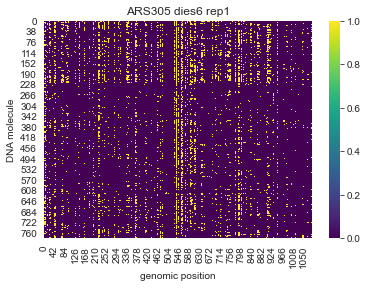

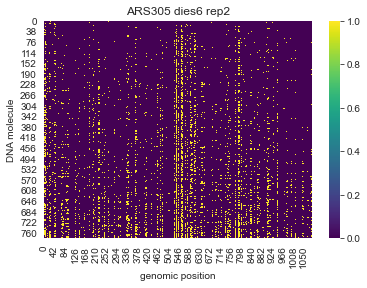

In [233]:
ARS305_dies6_rep1 = np.loadtxt("ARS305/DIES6_ALL_REP1_ARS305_end_LexA.txt")
ARS305_dies6_rep1.shape

sns.heatmap(ARS305_dies6_rep1, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, ARS305_dies6_rep1.shape[1])
plt.title("ARS305 dies6 rep1")
plt.show()

ARS305_dies6_rep2 = np.genfromtxt("ARS305/DIES6_ARS305_REP2_780READS.csv", dtype = int, delimiter = ",")
ARS305_dies6_rep2.shape

sns.heatmap(ARS305_dies6_rep2, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, ARS305_dies6_rep2.shape[1])
plt.title("ARS305 dies6 rep2")
plt.show()

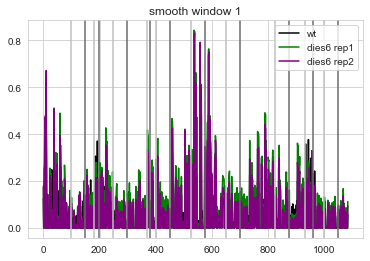

(28113.0, 2.615838000341427e-36)

In [234]:
smooth = 1

sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(joined_wt.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(ARS305_dies6_rep1.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "green", label = "dies6 rep1")
sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(ARS305_dies6_rep2.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "purple", label = "dies6 rep2")
plt.title("smooth window " + str(smooth))

for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
    
plt.show()

ARS305_wt_smooth_mean = np.convolve(joined_wt.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
ARS305_dies6_rep1_smooth_mean = np.convolve(ARS305_dies6_rep1.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
ARS305_dies6_rep2_smooth_mean = np.convolve(ARS305_dies6_rep2.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")

means_ARS305 = np.concatenate((ARS305_wt_smooth_mean.reshape(1, 1084), 
                              ARS305_dies6_rep1_smooth_mean.reshape(1, 1084),
                              ARS305_dies6_rep2_smooth_mean.reshape(1, 1084)),
                              axis = 0)

from scipy.stats import wilcoxon

w, p = wilcoxon(means_ARS305[0,:], means_ARS305[1,:], alternative = "two-sided")
w,p

In [235]:
#the statistical test shows that the replicates of the mutants are rather different: 
wilcoxon(ARS305_dies6_rep1.mean(axis = 0), 
         ARS305_dies6_rep2.mean(axis = 0), alternative = "two-sided")

WilcoxonResult(statistic=12954.0, pvalue=1.627377475716176e-58)

## Load data for mutant disw2

(780, 1084)


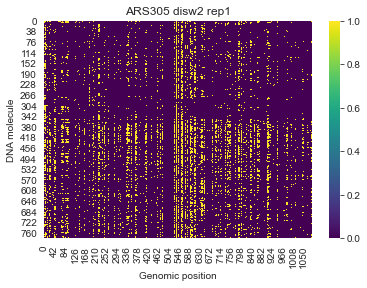

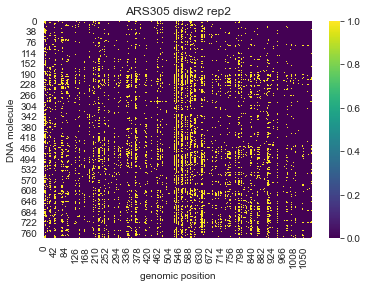

In [236]:
ARS305_disw2_rep1 = np.genfromtxt("ARS305/ARS305_disw2_rep1_780READS_noNA.csv", dtype = int,
                                 delimiter = ",")
print(ARS305_disw2_rep1.shape)

sns.heatmap(ARS305_disw2_rep1, cmap = "viridis")
plt.xlabel("Genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, ARS305_disw2_rep1.shape[1])
plt.title("ARS305 disw2 rep1")
plt.show()

ARS305_disw2_rep2 = np.genfromtxt("ARS305/ARS305_disw2_rep2_780READS_noNA.csv", dtype = int, delimiter = ",")
ARS305_disw2_rep2.shape

sns.heatmap(ARS305_disw2_rep2, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, ARS305_disw2_rep2.shape[1])
plt.title("ARS305 disw2 rep2")
plt.show()

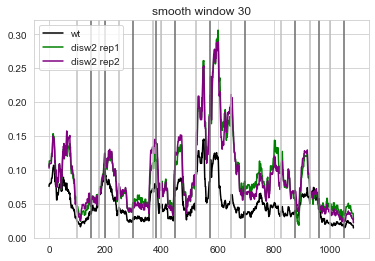

In [237]:
smooth_width = 30

sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(joined_wt.mean(axis = 0), np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(ARS305_disw2_rep1.mean(axis = 0), np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "green", label = "disw2 rep1")
sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(ARS305_disw2_rep2.mean(axis = 0), np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "purple", label = "disw2 rep2")
plt.title("smooth window " + str(smooth_width))

for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
    
plt.show()

In [238]:
# calculate the mean over all molecules and smooth with window size "smooth"

ARS305_disw2_rep1_smooth_mean = np.convolve(ARS305_disw2_rep1.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
ARS305_disw2_rep2_smooth_mean = np.convolve(ARS305_disw2_rep2.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")

means_ARS305 = np.concatenate((means_ARS305, 
                              ARS305_disw2_rep1_smooth_mean.reshape(1, 1084),
                              ARS305_disw2_rep2_smooth_mean.reshape(1, 1084)),
                              axis = 0)

w, p = wilcoxon(ARS305_disw2_rep1.mean(axis = 0),
                ARS305_disw2_rep2.mean(axis = 0), alternative = "two-sided")
w,p

(67976.5, 0.14291349241154117)

## Condense segment information for statistical testing of methylation per feature window

In [239]:
ARS305_segments = ARS305_anno.drop(columns = "position")

#list comprehension to catch the smoothed methylation values per sample in a cell per column
array_list = [ARS305_wt_smooth_mean[ARS305_segments.loc[index, "pos_start"]:ARS305_segments.loc[index, "pos_stop"]] for 
 index in ARS305_segments.index]

ARS305_segments["wt_smooth_mean"] = pd.Series(array_list, index = ARS305_segments.index)

#dies6 mutant 
array_list = [ARS305_dies6_rep1_smooth_mean[ARS305_segments.loc[index, "pos_start"]:ARS305_segments.loc[index, "pos_stop"]] for 
 index in ARS305_segments.index]
ARS305_segments["dies6_rep1_smooth_mean"] = pd.Series(array_list, index = ARS305_segments.index)

array_list = [ARS305_dies6_rep2_smooth_mean[ARS305_segments.loc[index, "pos_start"]:ARS305_segments.loc[index, "pos_stop"]] for 
 index in ARS305_segments.index]
ARS305_segments["dies6_rep2_smooth_mean"] = pd.Series(array_list, index = ARS305_segments.index)

#disw2 mutant

array_list = [ARS305_disw2_rep1_smooth_mean[ARS305_segments.loc[index, "pos_start"]:ARS305_segments.loc[index, "pos_stop"]] for 
 index in ARS305_segments.index]
ARS305_segments["disw2_rep1_smooth_mean"] = pd.Series(array_list, index = ARS305_segments.index)

array_list = [ARS305_disw2_rep2_smooth_mean[ARS305_segments.loc[index, "pos_start"]:ARS305_segments.loc[index, "pos_stop"]] for 
 index in ARS305_segments.index]
ARS305_segments["disw2_rep2_smooth_mean"] = pd.Series(array_list, index = ARS305_segments.index)

In [240]:
#this chunk doesn't work yet, it should catch the values per sample automatically from a list of samples
#samples = [ARS305_wt_smooth_mean, ARS305_dies6_rep1_smooth_mean, ARS305_dies6_rep2_smooth_mean]

#ARS305_segments = ARS305_anno.drop(columns = "position")

#for sample in samples:
#    temp_array_list = [samples[ARS305_segments.loc[index, "pos_start"]:ARS305_segments.loc[index, "pos_stop"]] for
#                  index in ARS305_segments.index]
#    #print(temp_array_list)
#    ARS305_segments[sample] = pd.Series(temp_array_list, index = ARS305_segments.index)   

In [241]:
#ARS305_segments.drop(index = ["L+2", "L-1"], inplace = True)

ARS305_segments["p_value_dies6_rep1"] = [wilcoxon(ARS305_segments.loc[index, "wt_smooth_mean"], 
                                                ARS305_segments.loc[index,"dies6_rep1_smooth_mean"],
                                                alternative = "two-sided").pvalue for index in ARS305_segments.index]

ARS305_segments["p_value_dies6_rep2"] = [wilcoxon(ARS305_segments.loc[index, "wt_smooth_mean"], 
                                                ARS305_segments.loc[index,"dies6_rep2_smooth_mean"],
                                                alternative = "two-sided").pvalue for index in ARS305_segments.index]

ARS305_segments["p_value_disw2_rep1"] = [wilcoxon(ARS305_segments.loc[index, "wt_smooth_mean"], 
                                                ARS305_segments.loc[index,"disw2_rep1_smooth_mean"],
                                                alternative = "two-sided").pvalue for index in ARS305_segments.index]

ARS305_segments["p_value_disw2_rep2"] = [wilcoxon(ARS305_segments.loc[index, "wt_smooth_mean"], 
                                                ARS305_segments.loc[index,"disw2_rep2_smooth_mean"],
                                                alternative = "two-sided").pvalue for index in ARS305_segments.index]

/Users/karoline.holler/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/karoline.holler/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [242]:
print("           Overview of p-values for different mutants")
print("           Smoothing window: " + str(smooth))
print("           The linker regions L-1 and L+2 are too short for a reliable Wilcoxon-Test without smoothing")
ARS305_segments.drop(ARS305_segments.columns[3:8], axis =1)

           Overview of p-values for different mutants
           Smoothing window: 1
           The linker regions L-1 and L+2 are too short for a reliable Wilcoxon-Test without smoothing


,pos_start,pos_stop,length,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
-3ns,99,149,50,0.158990,0.420910,0.048625,0.044208
-2L,179,199,20,0.213524,0.038152,0.952765,0.858955
-2ns,249,299,50,0.012360,0.380905,0.005855,0.000697
-1L,369,379,10,0.011719,0.011719,0.011719,0.011719
-1ns,399,449,50,0.022988,0.544910,0.021418,0.011876
ARS305,524,574,50,0.019971,0.017378,0.008361,0.002708
+1ns,649,699,50,0.000110,0.000413,0.000110,0.000019
+2ns,824,874,50,0.000418,0.005642,0.000373,0.000027
+2L,929,959,30,0.694887,0.530285,0.530285,0.637870


In [261]:
pvalue = 2.5e-2

test = ARS305_segments.drop(ARS305_segments.columns[3:8], axis =1)

print("       Which sites have a different mean methylation for the disw2 mutatant?")
print("       P-value below: ", pvalue)
test.loc[(test["p_value_disw2_rep1"] < pvalue) & 
         (test["p_value_disw2_rep2"] < pvalue)]

       Which sites have a different mean methylation for the disw2 mutatant?
       P-value below:  0.025


,pos_start,pos_stop,length,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
-2ns,249,299,50,0.012360,0.380905,0.005855,0.000697
-1L,369,379,10,0.011719,0.011719,0.011719,0.011719
-1ns,399,449,50,0.022988,0.544910,0.021418,0.011876
ARS305,524,574,50,0.019971,0.017378,0.008361,0.002708
+1ns,649,699,50,0.000110,0.000413,0.000110,0.000019
+2ns,824,874,50,0.000418,0.005642,0.000373,0.000027
+3ns,999,1049,50,0.022089,0.188557,0.020271,0.001549


In [262]:
print("       Which sites have a different mean methylation for the dies6 mutatant?")
print("       P-value below: ", pvalue)

test.loc[(test["p_value_dies6_rep1"] < pvalue)& 
         (test["p_value_dies6_rep2"] < pvalue)]

       Which sites have a different mean methylation for the dies6 mutatant?
       P-value below:  0.025


,pos_start,pos_stop,length,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
-1L,369,379,10,0.011719,0.011719,0.011719,0.011719
ARS305,524,574,50,0.019971,0.017378,0.008361,0.002708
+1ns,649,699,50,0.000110,0.000413,0.000110,0.000019
+2ns,824,874,50,0.000418,0.005642,0.000373,0.000027


In [263]:
#Repeat this test for the case that methylation in one fragment is higher than in wildtype:
test_higher = ARS305_segments.iloc[:, :8]
test_higher["p_value_dies6_rep1"] = [wilcoxon(test_higher.loc[index, "wt_smooth_mean"], 
                                           test_higher.loc[index,"dies6_rep1_smooth_mean"],
                                                alternative = "less").pvalue for index in test_higher.index]

test_higher["p_value_dies6_rep2"] = [wilcoxon(test_higher.loc[index, "wt_smooth_mean"], 
                                           test_higher.loc[index,"dies6_rep2_smooth_mean"],
                                                alternative = "less").pvalue for index in test_higher.index]

test_higher["p_value_disw2_rep1"] = [wilcoxon(test_higher.loc[index, "wt_smooth_mean"], 
                                           test_higher.loc[index,"disw2_rep1_smooth_mean"],
                                                alternative = "less").pvalue for index in test_higher.index]

test_higher["p_value_disw2_rep2"] = [wilcoxon(test_higher.loc[index, "wt_smooth_mean"], 
                                           test_higher.loc[index,"disw2_rep2_smooth_mean"],
                                                alternative = "less").pvalue for index in test_higher.index]
test_higher.drop(test_higher.columns[3:8], axis =1, inplace = True)

/Users/karoline.holler/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/karoline.holler/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [264]:
#Regions significant for disw2:
pvalue = 2.5e-2

print("       Which sites have a a higher mean methylation for the disw2 mutatant?")
print("       P-value below: ", pvalue)
test_higher.loc[(test_higher["p_value_disw2_rep1"] < pvalue) & 
         (test_higher["p_value_disw2_rep2"] < pvalue)]

       Which sites have a a higher mean methylation for the disw2 mutatant?
       P-value below:  0.025


,pos_start,pos_stop,length,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
-3ns,99,149,50,0.079495,0.210455,0.024312,0.022104
-2ns,249,299,50,0.006180,0.809548,0.002928,0.000349
-1L,369,379,10,0.005859,0.005859,0.005859,0.005859
-1ns,399,449,50,0.011494,0.727545,0.010709,0.005938
ARS305,524,574,50,0.009985,0.008689,0.004180,0.001354
+1ns,649,699,50,0.000055,0.000206,0.000055,0.000009
+2ns,824,874,50,0.000209,0.002821,0.000186,0.000014
+3ns,999,1049,50,0.011045,0.094279,0.010135,0.000774


In [265]:
#Regions significant for dies6:
pvalue = 2.5e-2

print("       Which sites have a a higher mean methylation for the dies6 mutatant?")
print("       P-value below: ", pvalue)
test_higher.loc[(test_higher["p_value_dies6_rep1"] < pvalue) & 
         (test_higher["p_value_dies6_rep2"] < pvalue)]

       Which sites have a a higher mean methylation for the dies6 mutatant?
       P-value below:  0.025


,pos_start,pos_stop,length,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
-1L,369,379,10,0.005859,0.005859,0.005859,0.005859
ARS305,524,574,50,0.009985,0.008689,0.004180,0.001354
+1ns,649,699,50,0.000055,0.000206,0.000055,0.000009
+2ns,824,874,50,0.000209,0.002821,0.000186,0.000014


## Normalize each experiment to maximum values, and pool replicates

In [266]:
#[Normalize pooled wt replicates to max values (the minimum is always 0 with this kind of data, 
# so this simplifies the normalization to max-scaling)]

###wt_min_max = joined_wt.mean(axis = 0)/joined_wt.mean(axis = 0).max()
# normalize the mean values of the mutants to the values of the wildtype
#dies6_min_max = joined_dies6.mean(axis = 0)/joined_dies6.mean(axis = 0).max()
#disw2_min_max = joined_disw2.mean(axis = 0)/joined_disw2.mean(axis = 0).max()

#pool the mutant replicates
#joined_dies6 = np.concatenate((ARS305_dies6_rep1, ARS305_dies6_rep2), axis = 0)
#joined_dies6.shape

#joined_disw2 = np.concatenate((ARS305_disw2_rep1, ARS305_disw2_rep2), axis = 0)
#joined_disw2.shape


wt_rep3_minmax = ARS305_wt.mean(axis = 0)/ARS305_wt.mean(axis = 0).max()
wt_rep2_minmax = ARS305_wt_rep2.mean(axis = 0)/ARS305_wt_rep2.mean(axis = 0).max()

pooled_wt = np.concatenate((wt_rep3_minmax.reshape(1, -1), wt_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

#dies6
dies6_rep1_minmax = ARS305_dies6_rep1.mean(axis = 0)/ARS305_dies6_rep1.mean(axis = 0).max()
dies6_rep2_minmax = ARS305_dies6_rep2.mean(axis = 0)/ARS305_dies6_rep2.mean(axis = 0).max()

pooled_dies6 = np.concatenate((dies6_rep1_minmax.reshape(1, -1), dies6_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

#disw2
disw2_rep1_minmax = ARS305_disw2_rep1.mean(axis = 0)/ARS305_disw2_rep1.mean(axis = 0).max()
disw2_rep2_minmax = ARS305_disw2_rep2.mean(axis = 0)/ARS305_disw2_rep2.mean(axis = 0).max()

pooled_disw2 = np.concatenate((disw2_rep1_minmax.reshape(1, -1), disw2_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

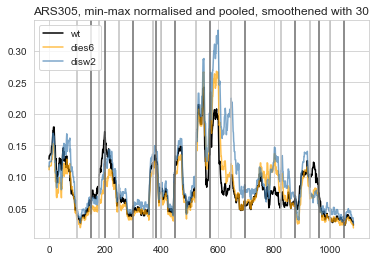

In [267]:
N=30

sns.lineplot(x = range(pooled_wt.shape[0]),
             y = np.convolve(pooled_wt, np.ones(N)/N, mode="same"), #wt_min_max
             color = "black", 
            label = "wt")
sns.lineplot(x = range(pooled_wt.shape[0]),
             y = np.convolve(pooled_dies6, np.ones(N)/N, mode="same"), #dies6_min_max
             color = "orange", alpha = 0.7,
            label = "dies6")
sns.lineplot(x = range(pooled_wt.shape[0]),
            y = np.convolve(pooled_disw2, np.ones(N)/N, mode = "same"), #disw2_min_max
            color = "steelblue", alpha = 0.7,
            label = "disw2")
plt.title("ARS305, min-max normalised and pooled, smoothened with " + str(N)) #pooled and min-max normalised
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")

Text(0.5, 1.0, 'Fold change between mutant and wildtype')

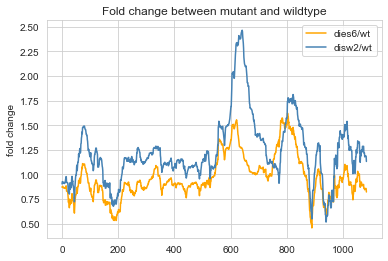

In [268]:
sns.lineplot(x = range(pooled_wt.shape[0]),
             y = np.convolve(pooled_dies6, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same"),
            color = "orange", 
             label = "dies6/wt")
sns.lineplot(x = range(pooled_wt.shape[0]),
             y = np.convolve(pooled_disw2, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same"),
            color = "steelblue",
             label = "disw2/wt")
plt.ylabel("fold change")
plt.title("Fold change between mutant and wildtype")


### Compare mean distributions between pooled replicates and wildtype with paired wilcoxon test

In [269]:
segments = ARS305_anno.drop(columns = "position")

#list comprehension to catch the pooled methylation values per sample in a cell per column
array_list = [pooled_wt[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["wt_mean"] = pd.Series(array_list, index = segments.index)

#dies6 mutant 
array_list = [pooled_dies6[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["dies6_mean"] = pd.Series(array_list, index = segments.index)

#disw2 mutant

array_list = [pooled_disw2[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["disw2_mean"] = pd.Series(array_list, index = segments.index)

In [270]:
segments["p_value_dies6"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"dies6_mean"],
                                                alternative = "two-sided").pvalue for index in segments.index]

segments["p_value_disw2"] = [wilcoxon(ARS305_segments.loc[index, "wt_smooth_mean"], 
                                                segments.loc[index,"disw2_mean"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments.drop(segments.columns[3:6], axis =1, inplace = True)

/Users/karoline.holler/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/karoline.holler/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [271]:
#Regions significant for dies6:
pvalue = 2.5e-2

print("       Which sites have a different mean methylation in the dies6 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_dies6"] < pvalue)]

       Which sites have a different mean methylation in the dies6 mutant?
       P-value below:  0.025


,pos_start,pos_stop,length,p_value_dies6,p_value_disw2
0,,,,,
-2L,179,199,20,0.007686,0.858955
-2ns,249,299,50,0.001005,0.001435
-1ns,399,449,50,0.000058,0.016033


In [272]:
#Regions significant for disw2:
print("       Which sites have a different mean methylation in the disw2 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_disw2"] < pvalue)]

       Which sites have a different mean methylation in the disw2 mutant?
       P-value below:  0.025


,pos_start,pos_stop,length,p_value_dies6,p_value_disw2
0,,,,,
-2ns,249,299,50,0.001005,0.001435
-1L,369,379,10,0.483840,0.011719
-1ns,399,449,50,0.000058,0.016033
ARS305,524,574,50,0.162673,0.006133
+1ns,649,699,50,0.060937,0.000074
+2ns,824,874,50,0.030814,0.000068
+3ns,999,1049,50,0.935311,0.007397


### Compare pooled wildtype to mutant replicates, then filter regions

In [273]:
segments = ARS305_anno.drop(columns = "position")

#list comprehension to catch the pooled methylation values per sample in a cell per column
array_list = [pooled_wt[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["wt_mean"] = pd.Series(array_list, index = segments.index)

#dies6 mutant 
array_list = [dies6_rep1_minmax[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["dies6_mean_rep1"] = pd.Series(array_list, index = segments.index)

array_list = [dies6_rep2_minmax[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["dies6_mean_rep2"] = pd.Series(array_list, index = segments.index)


#disw2 mutant
array_list = [disw2_rep1_minmax[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["disw2_mean_rep1"] = pd.Series(array_list, index = segments.index)

array_list = [disw2_rep2_minmax[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["disw2_mean_rep2"] = pd.Series(array_list, index = segments.index)

#perform statistical test
segments["p_value_dies6_rep1"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"dies6_mean_rep1"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments["p_value_dies6_rep2"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"dies6_mean_rep2"],
                                                alternative = "two-sided").pvalue for index in segments.index]

segments["p_value_disw2_rep1"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"disw2_mean_rep1"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments["p_value_disw2_rep2"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"disw2_mean_rep2"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments.drop(segments.columns[3:8], axis =1, inplace = True)

/Users/karoline.holler/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/karoline.holler/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [274]:
segments

,pos_start,pos_stop,length,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
-3ns,99,149,50,0.398063,0.017583,0.600871,0.197833
-2L,179,199,20,0.007686,0.007686,0.066316,0.066316
-2ns,249,299,50,0.712671,0.000017,0.227662,0.073364
-1L,369,379,10,0.011719,0.011719,0.779435,0.011719
-1ns,399,449,50,0.777543,0.000012,0.087527,0.443172
ARS305,524,574,50,0.120839,0.191446,0.099540,0.069144
+1ns,649,699,50,0.000452,0.013339,0.000110,0.000178
+2ns,824,874,50,0.003860,0.855198,0.000821,0.000588
+2L,929,959,30,0.239317,0.084379,0.182338,0.182338


In [275]:
#Regions significant for dies6:
pvalue = 2.5e-2

print("       Which sites have a different mean methylation in the dies6 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_dies6_rep1"] < pvalue) &
            (segments["p_value_dies6_rep2"] < pvalue)]

       Which sites have a different mean methylation in the dies6 mutant?
       P-value below:  0.025


,pos_start,pos_stop,length,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
-2L,179,199,20,0.007686,0.007686,0.066316,0.066316
-1L,369,379,10,0.011719,0.011719,0.779435,0.011719
+1ns,649,699,50,0.000452,0.013339,0.000110,0.000178


In [276]:
#Regions significant for disw2:
pvalue = 2.5e-2

print("       Which sites have a different mean methylation in the disw2 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_disw2_rep1"] < pvalue) &
            (segments["p_value_disw2_rep2"] < pvalue)]

       Which sites have a different mean methylation in the disw2 mutant?
       P-value below:  0.025


,pos_start,pos_stop,length,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
+1ns,649,699,50,0.000452,0.013339,0.000110,0.000178
+2ns,824,874,50,0.003860,0.855198,0.000821,0.000588


In [279]:
ARS305_anno

,position,pos_start,pos_stop,length
0,,,,
-3ns,100..150,99,149,50
-2L,180..200,179,199,20
-2ns,250..300,249,299,50
-1L,370..380,369,379,10
-1ns,400..450,399,449,50
ARS305,525..575,524,574,50
+1ns,650..700,649,699,50
+2ns,825..875,824,874,50
+2L,930..960,929,959,30


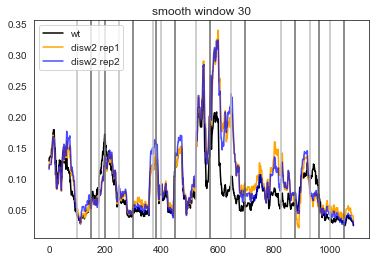

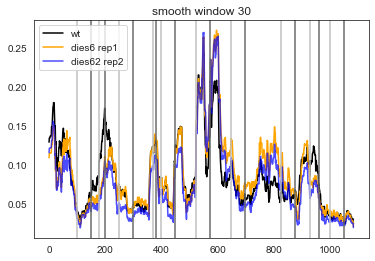

In [280]:
# How does that look over the whole sequence?

sns.set_style("white")
smooth_width = 30

sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(pooled_wt, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(disw2_rep1_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "orange", label = "disw2 rep1")
sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(disw2_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "blue", alpha = 0.7, label = "disw2 rep2")
plt.title("smooth window " + str(smooth_width))

for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
    
plt.show()

sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(pooled_wt, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(dies6_rep1_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "orange", label = "dies6 rep1")
sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(dies6_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "blue", alpha = 0.7, label = "dies62 rep2")
plt.title("smooth window " + str(smooth_width))

for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
    
plt.show()

### Normalize part of the ARS305 sequence to part of the naked plasmid 

bases 4083 -4792 in the naked plasmid correspond to 
223 -932 in ARS305

they contain: L-1, NS-1, ARS305, NS+1, L+1 and a part of NS+2

In [66]:
#subset the overlap in between the sequences

overlap_plasmid_wt3 = wt_rep3_naked_plasmid[:, 4082:4791]
overlap_plasmid_wt2 = wt_rep2_naked_plasmid[:, 4082:4791]

overlap_plasmid_dies6_1 = dies6_rep1_naked[:, 4082:4791]
overlap_plasmid_dies6_2 = dies6_rep2_naked[:, 4082:4791]

overlap_plasmid_dies6_1 = disw2_rep1_naked[:, 4082:4791]
overlap_plasmid_disw2_2 = disw2_rep2_naked[:, 4082:4791]

overlap_ARS305_wt3 = ARS305_wt[:, 222:931]
overlap_ARS305_wt2 = ARS305_wt_rep2[:, 222:931]

overlap_ARS305_dies6_1 = ARS305_dies6_rep1[:, 222:931]
overlap_ARS305_dies6_2 = ARS305_dies6_rep2[:, 222:931]
overlap_ARS305_disw2_1 = ARS305_disw2_rep1[:, 222:931]
overlap_ARS305_disw2_2 = ARS305_disw2_rep2[:, 222:931]

<AxesSubplot:>

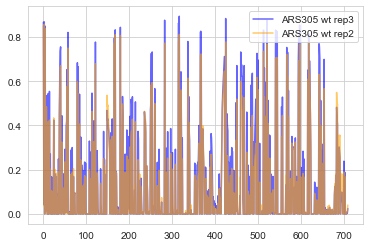

In [67]:
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), y = overlap_plasmid_wt3.mean(axis = 0), 
             color = "blue", label = "ARS305 wt rep3", alpha = 0.6)
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), y = overlap_plasmid_wt2.mean(axis = 0), 
             color = "orange", label = "ARS305 wt rep2", alpha = 0.6)

In [68]:
overlap_plasmid_wt_joined = np.concatenate((overlap_plasmid_wt3, overlap_plasmid_wt2), axis = 0).mean(axis=0)

Text(0.5, 1.0, 'Mean values before normalization')

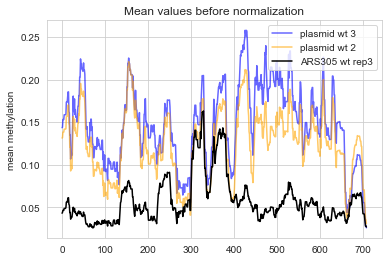

In [69]:
N=30


sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_plasmid_wt3.mean(axis = 0), np.ones(N)/N, mode ="same"), 
             color = "blue", label = "plasmid wt 3", alpha = 0.6)
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_plasmid_wt2.mean(axis = 0), np.ones(N)/N, mode ="same"), 
             color = "orange", label = "plasmid wt 2", alpha = 0.6)
#sns.lineplot(x = range(overlap_ARS305.shape[1]), 
#             y = np.convolve(overlap_plasmid_wt_joined, np.ones(N)/N, mode ="same"), 
#             color = "darkgreen", label = "joined plasmids", alpha = 0.6)
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_ARS305_wt3.mean(axis = 0), np.ones(N)/N, mode ="same"), 
             color = "black", label = "ARS305 wt rep3")
plt.ylabel("mean methylation")
plt.title("Mean values before normalization")

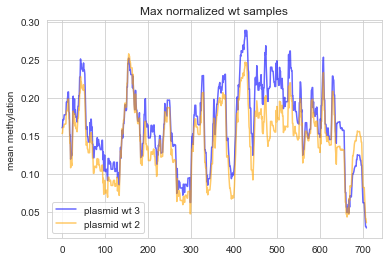

Text(0.5, 1.0, 'Max normalized samples averaged by condition')

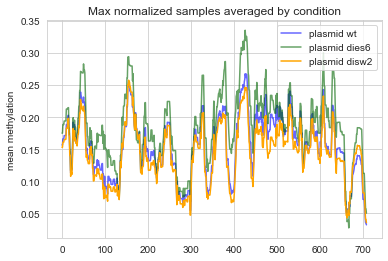

In [71]:
#before normalization, max-scale replicates, pool and average

#plasmid control wt
overlap_wt3_maxnorm = wt_rep3_naked_plasmid[:, 4082:4791].mean(axis=0)/wt_rep3_naked_plasmid[:, 4082:4791].mean(axis=0).max()
overlap_wt2_maxnorm = wt_rep2_naked_plasmid[:, 4082:4791].mean(axis=0)/wt_rep2_naked_plasmid[:, 4082:4791].mean(axis=0).max()

sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_wt3_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "blue", label = "plasmid wt 3", alpha = 0.6)
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_wt2_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "orange", label = "plasmid wt 2", alpha = 0.6)
plt.ylabel("mean methylation")
plt.title("Max normalized wt samples")
plt.show()

overlap_wt_maxnorm = np.concatenate((overlap_wt3_maxnorm.reshape(-1, 709),
                                     overlap_wt2_maxnorm.reshape(-1, 709)), axis = 0).mean(axis=0)
#plasmid control for dies6
overlap_dies61_maxnorm = dies6_rep1_naked[:, 4082:4791].mean(axis=0)/dies6_rep1_naked[:, 4082:4791].mean(axis=0).max()
overlap_dies62_maxnorm = dies6_rep2_naked[:, 4082:4791].mean(axis=0)/dies6_rep2_naked[:, 4082:4791].mean(axis=0).max()
overlap_dies6_maxnorm = np.concatenate((overlap_dies61_maxnorm.reshape(-1, 709),
                                     overlap_dies62_maxnorm.reshape(-1, 709)), axis = 0).mean(axis=0)

#plasmid control for disw2
overlap_disw21_maxnorm = disw2_rep1_naked[:, 4082:4791].mean(axis=0)/disw2_rep1_naked[:, 4082:4791].mean(axis=0).max()
overlap_disw22_maxnorm = disw2_rep2_naked[:, 4082:4791].mean(axis=0)/disw2_rep2_naked[:, 4082:4791].mean(axis=0).max()
overlap_disw2_maxnorm = np.concatenate((overlap_disw21_maxnorm.reshape(-1, 709),
                                     overlap_disw22_maxnorm.reshape(-1, 709)), axis = 0).mean(axis=0)

sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_wt_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "blue", label = "plasmid wt", alpha = 0.6)
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_dies6_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "darkgreen", label = "plasmid dies6", alpha = 0.6)
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), 
             y = np.convolve(overlap_wt2_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "orange", label = "plasmid disw2")
plt.ylabel("mean methylation")
plt.title("Max normalized samples averaged by condition")

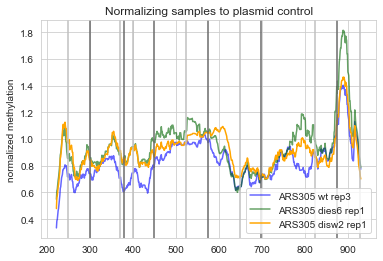

In [199]:
#normalize conditions for ARS305 to the respective plasmid control
# here, normalize each sample from the origin to the pooled control from the respective plasmid sample
norm_overlap_ARS305_wt3 = (overlap_ARS305_wt3.mean(axis=0)+ 0.01)/(overlap_wt_maxnorm+0.01)
norm_overlap_ARS305_dies6_rep1 = (overlap_ARS305_dies6_1.mean(axis=0)+ 0.01)/(overlap_dies6_maxnorm+0.01)
norm_overlap_ARS305_disw2_rep1 = (overlap_ARS305_disw2_1.mean(axis=0)+ 0.01)/(overlap_disw2_maxnorm+0.01)

N=30

sns.lineplot(x = range(222,931), 
             y = np.convolve(norm_overlap_ARS305_wt3, np.ones(N)/N, mode ="same"), 
             color = "blue", label = "ARS305 wt rep3", alpha = 0.6)
sns.lineplot(x = range(222,931), 
             y = np.convolve(norm_overlap_ARS305_dies6_rep1, np.ones(N)/N, mode ="same"), 
             color = "darkgreen", label = "ARS305 dies6 rep1", alpha = 0.6)
sns.lineplot(x = range(222,931), 
             y = np.convolve(norm_overlap_ARS305_disw2_rep1, np.ones(N)/N, mode ="same"), 
             color = "orange", label = "ARS305 disw2 rep1")
plt.ylabel("normalized methylation")
plt.title("Normalizing samples to plasmid control")

for border in ARS305_anno.loc[:, "pos_start"]:
    if 222 < border < 935:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if 222 < border < 935:
        plt.axvline(border, color = "dimgray")

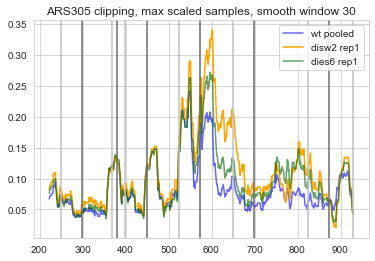

In [200]:
#Comparing to the normalization to to maximum values scaled samples per experiment

sns.lineplot(x = range(222,931), 
                 y = np.convolve(pooled_wt[222:931], np.ones(N)/N, mode ="same"),
             color = "blue", label = "wt pooled", alpha = 0.6)
sns.lineplot(x = range(222,931), 
                 y = np.convolve(disw2_rep1_minmax[222:931], np.ones(N)/N, mode ="same"),
             color = "orange", label = "disw2 rep1")
sns.lineplot(x = range(222,931), 
                 y = np.convolve(dies6_rep1_minmax[222:931], np.ones(N)/N, mode ="same"),
             color = "darkgreen", label = "dies6 rep1", alpha = 0.6)
plt.title("ARS305 clipping, max scaled samples, smooth window " + str(N))

for border in ARS305_anno.loc[:, "pos_start"]:
    if 222 < border < 935:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if 222 < border < 935:
        plt.axvline(border, color = "dimgray")
    
plt.show()

Normalize origin ARS305 to part of the plasmid sequence (without scaling)


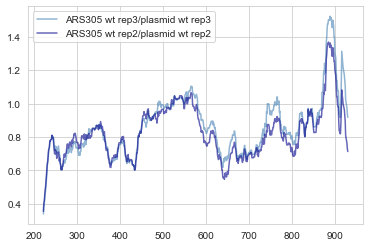

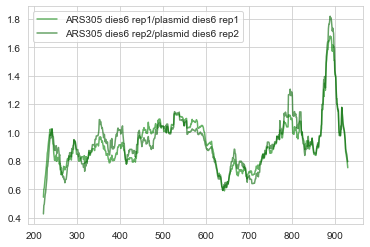

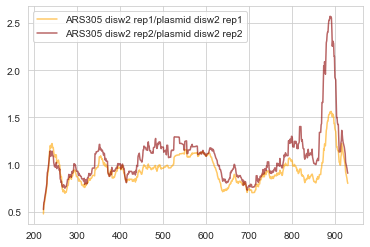

In [74]:
# Different approach: Normalize samples in between experiments - ARS305 wt rep3 to plasmid wt rep3
print("Normalize origin ARS305 to part of the plasmid sequence (without scaling)")
sns.lineplot(x = range(222,931), 
             y = np.convolve((ARS305_wt[:, 222:931].mean(axis = 0)+0.01)/(wt_rep3_naked_plasmid[:, 4082:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "steelblue", label = "ARS305 wt rep3/plasmid wt rep3", alpha = 0.6)
sns.lineplot(x = range(222,931), 
             y = np.convolve((ARS305_wt_rep2[:, 222:931].mean(axis = 0)+0.01)/(wt_rep2_naked_plasmid[:, 4082:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "darkblue", label = "ARS305 wt rep2/plasmid wt rep2", alpha = 0.6)
plt.show()

sns.lineplot(x = range(222,931), 
             y = np.convolve((ARS305_dies6_rep1[:, 222:931].mean(axis = 0)+0.01)/(dies6_rep1_naked[:, 4082:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "green", label = "ARS305 dies6 rep1/plasmid dies6 rep1", alpha = 0.6)
sns.lineplot(x = range(222,931), 
             y = np.convolve((ARS305_dies6_rep2[:, 222:931].mean(axis = 0)+0.01)/(dies6_rep2_naked[:, 4082:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "darkgreen", label = "ARS305 dies6 rep2/plasmid dies6 rep2", alpha = 0.6)
plt.show()


sns.lineplot(x = range(222,931), 
             y = np.convolve((ARS305_disw2_rep1[:, 222:931].mean(axis = 0)+0.01)/(disw2_rep1_naked[:, 4082:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "orange", label = "ARS305 disw2 rep1/plasmid disw2 rep1", alpha = 0.6)
sns.lineplot(x = range(222,931), 
             y = np.convolve((ARS305_disw2_rep2[:, 222:931].mean(axis = 0)+0.01)/(disw2_rep2_naked[:, 4082:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "darkred", label = "ARS305 disw2 rep2/plasmid disw2 rep2", alpha = 0.6)
plt.show()

In [93]:
#Pool replicates per condition and compare the plasmid control

ARS305_wt3_norm = (ARS305_wt[:, 222:931].mean(axis = 0)+0.1)/(wt_rep3_naked_plasmid[:, 4082:4791].mean(axis = 0)+0.1)
ARS305_wt2_norm = (ARS305_wt_rep2[:, 222:931].mean(axis = 0)+0.1)/(wt_rep2_naked_plasmid[:, 4082:4791].mean(axis = 0)+0.1)
ARS305_wt_norm_pooled = np.concatenate((ARS305_wt3_norm.reshape(-1, 709), ARS305_wt3_norm.reshape(-1, 709)), axis=0).mean(axis = 0)

ARS305_dies61_norm = (ARS305_dies6_rep1[:, 222:931].mean(axis = 0)+0.1)/(dies6_rep1_naked[:, 4082:4791].mean(axis = 0)+0.1)
ARS305_dies62_norm = (ARS305_dies6_rep2[:, 222:931].mean(axis = 0)+0.1)/(dies6_rep2_naked[:, 4082:4791].mean(axis = 0)+0.1) 
ARS305_dies6_norm_pooled = np.concatenate((ARS305_dies61_norm.reshape(-1, 709), ARS305_dies62_norm.reshape(-1, 709)), axis=0).mean(axis = 0)

ARS305_disw21_norm = (ARS305_disw2_rep1[:, 222:931].mean(axis = 0)+0.1)/(disw2_rep1_naked[:, 4082:4791].mean(axis = 0)+0.1)
ARS305_disw22_norm = (ARS305_disw2_rep2[:, 222:931].mean(axis = 0)+0.1)/(disw2_rep2_naked[:, 4082:4791].mean(axis = 0)+0.1)
ARS305_disw2_norm_pooled = np.concatenate((ARS305_disw21_norm.reshape(-1, 709), ARS305_disw22_norm.reshape(-1, 709)), axis=0).mean(axis = 0)

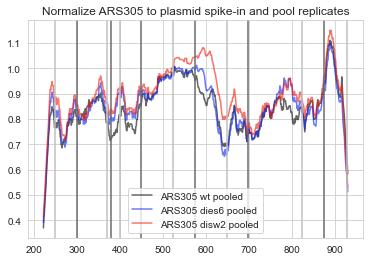

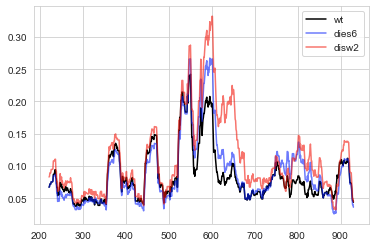

In [201]:
sns.lineplot(x = range(222,931), 
             y = np.convolve(ARS305_wt_norm_pooled, 
                             np.ones(N)/N, mode ="same"), 
             color = "black", label = "ARS305 wt pooled", alpha = 0.6)
sns.lineplot(x = range(222,931), 
             y = np.convolve(ARS305_dies6_norm_pooled, 
                             np.ones(N)/N, mode ="same"), 
             color = "#0a22fa", label = "ARS305 dies6 pooled", alpha = 0.6)
sns.lineplot(x = range(222,931), 
             y = np.convolve(ARS305_disw2_norm_pooled, 
                             np.ones(N)/N, mode ="same"), 
             color = "#f2180c", label = "ARS305 disw2 pooled", alpha = 0.6)
plt.title("Normalize ARS305 to plasmid spike-in and pool replicates")

for border in ARS305_anno.loc[:, "pos_start"]:
    if 222 < border < 935:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if 222 < border < 935:
        plt.axvline(border, color = "dimgray")
#plt.savefig("controls/ARS305_plasmid_norm_pooled_samples.png", dpi=300)
plt.show()

#compare trend to max scaled dsitributions from pooled data:
sns.lineplot(x = range(222,931),
             y = np.convolve(pooled_wt[222:931], np.ones(N)/N, mode="same"),
             color = "black", 
            label = "wt")
sns.lineplot(x = range(222,931),
             y = np.convolve(pooled_dies6[222:931], np.ones(N)/N, mode="same"),
             color = "#0a22fa", alpha = 0.6,
            label = "dies6")
sns.lineplot(x = range(222,931),
            y = np.convolve(pooled_disw2[222:931], np.ones(N)/N, mode = "same"),
            color = "#f2180c", alpha = 0.6,
            label = "disw2")
#plt.savefig("controls/ARS305_max_norm_pooled_samples.png", dpi=300)
plt.show()

In [173]:
#Search for differentially methylated features in data that was normalised to plasmid data

segments = ARS305_anno.drop(columns = "position")

#list comprehension to catch the pooled methylation values per sample in a cell per column
array_list = [ARS305_wt_norm_pooled[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["wt_norm_plasmid"] = pd.Series(array_list, index = segments.index)

#dies6 mutant 
array_list = [ARS305_dies61_norm[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["dies6_rep1_norm_plasmid"] = pd.Series(array_list, index = segments.index)

array_list = [ARS305_dies62_norm[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["dies6_rep2_norm_plasmid"] = pd.Series(array_list, index = segments.index)


#disw2 mutant
array_list = [ARS305_disw21_norm[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["disw2_rep1_norm_plasmid"] = pd.Series(array_list, index = segments.index)

array_list = [ARS305_disw22_norm[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["disw2_rep2_norm_plasmid"] = pd.Series(array_list, index = segments.index)

In [187]:
# for plasmid normlaised data, we don't have values for +2ns, +L, +3ns. So, discard these rows
segments.drop(segments.index[-3:], axis = 0, inplace=True)

In [191]:
#perform statistical test
segments["p_value_dies6_rep1"] = [wilcoxon(segments.loc[index, "wt_norm_plasmid"], 
                                                segments.loc[index,"dies6_rep1_norm_plasmid"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments["p_value_dies6_rep2"] = [wilcoxon(segments.loc[index, "wt_norm_plasmid"], 
                                                segments.loc[index,"dies6_rep2_norm_plasmid"],
                                                alternative = "two-sided").pvalue for index in segments.index]

segments["p_value_disw2_rep1"] = [wilcoxon(segments.loc[index, "wt_norm_plasmid"], 
                                                segments.loc[index,"disw2_rep1_norm_plasmid"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments["p_value_disw2_rep2"] = [wilcoxon(segments.loc[index, "wt_norm_plasmid"], 
                                                segments.loc[index,"disw2_rep2_norm_plasmid"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments.drop(segments.columns[3:8], axis =1, inplace = True)

/Users/karoline.holler/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/karoline.holler/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [192]:
segments

,pos_start,pos_stop,length,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
-3ns,99,149,50,0.178810,0.917632,0.043733,0.017378
-2L,179,199,20,0.138641,0.441268,0.028402,0.066316
-2ns,249,299,50,0.331832,0.016822,0.831310,0.004184
-1L,369,379,10,0.017960,0.017960,0.017960,0.017960
-1ns,399,449,50,0.137279,0.033230,0.003032,0.000002
ARS305,524,574,50,0.003822,0.174210,0.300241,0.137355
+1ns,649,699,50,0.532201,0.008826,0.179106,0.001550


In [194]:
#Regions significant for dies6:
pvalue = 2.5e-2

print("       Which sites have a different mean methylation in the dies6 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_dies6_rep1"] < pvalue) &
            (segments["p_value_dies6_rep2"] < pvalue)]

       Which sites have a different mean methylation in the dies6 mutant?
       P-value below:  0.025


,pos_start,pos_stop,length,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
-1L,369,379,10,0.01796,0.01796,0.01796,0.01796


In [195]:
#Regions significant for disw2:
pvalue = 2.5e-2

print("       Which sites have a different mean methylation in the disw2 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_disw2_rep1"] < pvalue) &
            (segments["p_value_disw2_rep2"] < pvalue)]

       Which sites have a different mean methylation in the disw2 mutant?
       P-value below:  0.025


,pos_start,pos_stop,length,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
-1L,369,379,10,0.017960,0.01796,0.017960,0.017960
-1ns,399,449,50,0.137279,0.03323,0.003032,0.000002


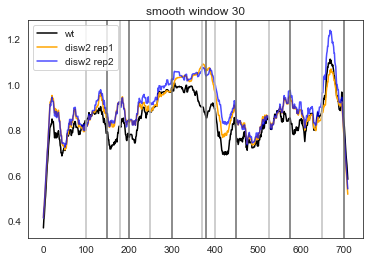

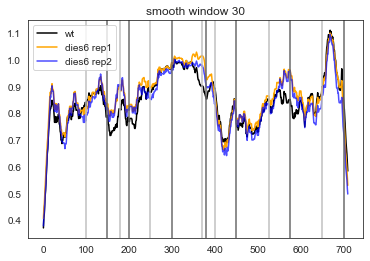

In [286]:
smooth_width = 30

sns.lineplot(x = range(ARS305_wt_norm_pooled.shape[0]), 
                 y = np.convolve(ARS305_wt_norm_pooled, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(ARS305_wt_norm_pooled.shape[0]), 
                 y = np.convolve(ARS305_disw21_norm, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "orange", label = "disw2 rep1")
sns.lineplot(x = range(ARS305_wt_norm_pooled.shape[0]), 
                 y = np.convolve(ARS305_disw22_norm, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "blue", alpha = 0.7, label = "disw2 rep2")
plt.title("smooth window " + str(smooth_width))

for border in ARS305_anno.loc[:, "pos_start"]:
    if border < 800:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if border < 800:
        plt.axvline(border, color = "dimgray")
    
plt.show()

sns.lineplot(x = range(ARS305_wt_norm_pooled.shape[0]), 
                 y = np.convolve(ARS305_wt_norm_pooled, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(ARS305_wt_norm_pooled.shape[0]), 
                 y = np.convolve(ARS305_dies61_norm, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "orange", label = "dies6 rep1")
sns.lineplot(x = range(ARS305_wt_norm_pooled.shape[0]), 
                 y = np.convolve(ARS305_dies62_norm, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "blue", alpha = 0.7, label = "dies6 rep2")
plt.title("smooth window " + str(smooth_width))

for border in ARS305_anno.loc[:, "pos_start"]:
    if border < 800:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if border < 800:
        plt.axvline(border, color = "dimgray")
    
plt.show()

In [76]:
#Exporting aggregated data for Anna to plot for the manuscript 
#31th May 2022

smooth = {"wt_pooled": np.convolve(pooled_wt, np.ones(smooth_width)/smooth_width, mode ="same"),
          "wt_rep3": np.convolve(wt_rep3_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
          "wt_rep2": np.convolve(wt_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
         "dies6_rep1": np.convolve(dies6_rep1_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
         "dies6_rep2": np.convolve(dies6_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
         "dies6_pooled": np.convolve(pooled_dies6, np.ones(smooth_width)/smooth_width, mode="same"),
         "disw2_rep1": np.convolve(disw2_rep1_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
         "disw2_rep2": np.convolve(disw2_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
         "disw2_pooled": np.convolve(pooled_disw2, np.ones(smooth_width)/smooth_width, mode="same")}


ARS305_smooth_30 = pd.DataFrame.from_dict(smooth)
ARS305_smooth_30.index = ARS305_smooth_30.index + 1
#ARS305_smooth_30.to_csv("ARS305/ARS305_smoothed_average_methylation_winsize_30.csv")

FC = {
    "dies6_pooled" : np.convolve(pooled_dies6, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same"),
    "disw2_pooled" : np.convolve(pooled_disw2, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same")
}

ARS305_FCs = pd.DataFrame.from_dict(FC)
ARS305_FCs.index = ARS305_FCs.index + 1

#ARS305_FCs.to_csv("ARS305/ARS305_smoothed_fold_changes_winsize_30.csv")

### Experimental: Try clustering methods of scRNAseq

In [77]:
#import scanpy

#joined_wt.shape

ModuleNotFoundError: No module named 'scanpy'